Pasos del Proyecto:
1_📥 Obtener Datos:

Descarga un conjunto de datos de temperatura histórica de fuentes como Kaggle o NOAA.
Si no tienes un dataset, puedes generarlo con NumPy.

2_📊 Análisis con Pandas:

Carga los datos en un DataFrame con pd.read_csv().
Filtra por ciudad, país o rango de años.
Calcula estadísticas básicas como media, mínima y máxima por año o estación.

3_📉 Visualización con Matplotlib:

Línea de tendencia: Usa plt.plot() para ver la evolución de la temperatura promedio.
Histogramas: Representa la distribución de temperaturas con plt.hist().
Boxplots: Usa plt.boxplot() para ver la variabilidad de temperaturas.
Mapas de calor (Heatmaps): Representa temperaturas por meses y años con imshow().

4_📈 Comparación de Ciudades:
Compara la temperatura de diferentes ciudades en el mismo gráfico.
Usa plt.subplot() para gráficos comparativos.


📌 Bonus:
Genera datos sintéticos con NumPy si no tienes datasets reales.
Exporta los gráficos en formato PNG con plt.savefig().
Agrega interactividad con matplotlib widgets o usa seaborn para mejorar la estética.

In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

2

Cargamos datos

In [45]:
df = pd.read_csv('weatherHistory.csv')
df

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.
...,...,...,...,...,...,...,...,...,...,...,...,...
96448,2016-09-09 19:00:00.000 +0200,Partly Cloudy,rain,26.016667,26.016667,0.43,10.9963,31.0,16.1000,0.0,1014.36,Partly cloudy starting in the morning.
96449,2016-09-09 20:00:00.000 +0200,Partly Cloudy,rain,24.583333,24.583333,0.48,10.0947,20.0,15.5526,0.0,1015.16,Partly cloudy starting in the morning.
96450,2016-09-09 21:00:00.000 +0200,Partly Cloudy,rain,22.038889,22.038889,0.56,8.9838,30.0,16.1000,0.0,1015.66,Partly cloudy starting in the morning.
96451,2016-09-09 22:00:00.000 +0200,Partly Cloudy,rain,21.522222,21.522222,0.60,10.5294,20.0,16.1000,0.0,1015.95,Partly cloudy starting in the morning.


Conv la columna fecha a datetime:

In [46]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce')#Acá pasamos la fecha a datetime y con el parám errors = 'coerce' lo que se hace es q si el valor de la fecha en iválido(ej:"hola""XXXX" o en un formato incorrecto)lo conv en Nat(not a time) esto equiv a NaN para la fechas y todo esto para evitar de dar un error

#Una vez siendo datetime ahora podemos sacarle la zona horario
df['Formatted Date'] = df['Formatted Date'].dt.tz_localize(None)#Como las fechas tenían zona horario se la eliminamos pasandole None a la fn tz_localize()

type(df['Formatted Date'][0])#Corroboramos si cambio de tipo de dato

C:\Users\zapan\AppData\Local\Temp\ipykernel_5760\262904452.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['Formatted Date'] = pd.to_datetime(df['Formatted Date'],errors='coerce')#Acá pasamos la fecha a datetime y con el parám errors = 'coerce' lo que se hace es q si el valor de la fecha en iválido(ej:"hola""XXXX" o en un formato incorrecto)lo conv en Nat(not a time) esto equiv a NaN para la fechas y todo esto para evitar de dar un error


AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
Filtramos por ciudad, país o rango de años.

In [47]:
rango_de_fecha= df[(df['Formatted Date'].dt.year > 2007)&(df['Formatted Date'].dt.year < 2010)]
rango_de_fecha

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
Calcula estadísticas básicas como media, mínima y máxima por año o estación.

In [ ]:
Por año

In [43]:
df['Años'] = df['Formatted Date'].dt.year#Obtenemos el año de la fecha
Humedad_Temp_max_min = df.groupby('Años')['Temperature (C)'].agg(['mean','max','min'])#Y acá agrup por año y dps sacamos las estadísticas básicas

Humedad_Temp_max_min

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
Por mes:

In [33]:
#Fn para asignar las estaciones a los meses
def asignarestacion(mes):#creacion de la fn con el Parám mes
    if mes in [12,1,2]:#Si el parám mes está en el rango de esta lista... 
        return 'Verano'#Q retorne verano
    elif mes in [3,4,5]:#Si el parám mes está en el rango de esta lista... 
        return 'Otoño'#Q retorne otoño
    elif mes in [6,7,8]:#Si el parám mes está en el rango de esta lista... 
        return 'Invierno'#Q retorne invierno
    else:#De lo contrario si no está en ninguna de esas lista...
        return 'Primavera'#Q dev primavera

df['Mes'] = df['Formatted Date'].dt.month#De acá sacamos el mes
df['Estación'] = df['Mes'].apply(asignarestacion)#Aplicacion de la fn a los serie Mes para crear una serie con las estaciones dependiendo de q mes es


Humedad_Temp_max_min = df.groupby('Estación')['Temperature (C)'].agg(['mean','min','max'])#Agrup por estaciones y obtenemos un min,max,mean de cada estacion
Humedad_Temp_max_min

,mean,min,max
Estación,,,
Invierno,22.022449,5.577778,39.905556
Otoño,14.602822,-3.888889,33.816667
Primavera,6.639862,-21.822222,37.150000


3

In [ ]:
Promedio de Temp de todos los años

In [42]:
df['Año']=df['Formatted Date'].dt.year
T_prom = df.groupby('Año')['Temperature (C)'].mean()
Evol_temp_prom = plt.plot(T_prom)

AttributeError: Can only use .dt accessor with datetimelike values

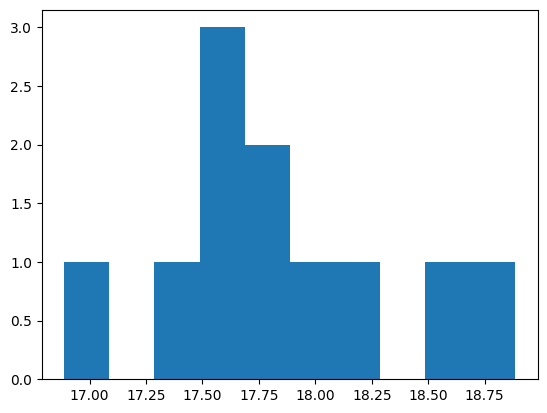

In [40]:
plt.hist(T_prom);

In [ ]:
plt.boxplot('T_prom')